<a href="https://colab.research.google.com/github/AngelineLawrence/Machine-Learning/blob/master/CNN_Mnist_Dataset_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Load and plot the dataset**

In [0]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

(X_train,Y_train),(X_test,Y_test) = mnist.load_data()

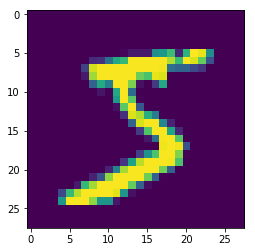

In [31]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [32]:
#Image shape
 X_train[0].shape

(28, 28)

**Data Preprocessing**

In [0]:
#Reshaping data to fit the model
#X_train = 60,000 , X_test = 10,000
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [0]:
#Encoding the target column
Y_train = to_categorical(Y_train)
Y_test  = to_categorical(Y_test)

#Normalize the pixel values of grayscale images, rescale them to the range [0,1]
X_train = X_train / 255
X_test = X_test / 255

**Creating a CNN Model**

In [35]:
model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='sigmoid'))

**Compiling the model**

In [0]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

**Training the model**

In [37]:
model.fit(X_train,Y_train, validation_data=(X_test, Y_test), epochs =3)

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 70s 1ms/step - loss: 0.1574 - acc: 0.9537 - val_loss: 0.0577 - val_acc: 0.9799
Epoch 2/3
60000/60000 [==============================] - 69s 1ms/step - loss: 0.0515 - acc: 0.9842 - val_loss: 0.0460 - val_acc: 0.9861
Epoch 3/3
60000/60000 [==============================] - 69s 1ms/step - loss: 0.0365 - acc: 0.9886 - val_loss: 0.0491 - val_acc: 0.9849


**Predicting the results for the first 10 datasets**

In [38]:
model.history.history

{'acc': [0.9536833333333333, 0.9842, 0.9886333333333334],
 'loss': [0.1573512971115609, 0.05150957907838747, 0.03649565497728375],
 'val_acc': [0.9799, 0.9861, 0.9849],
 'val_loss': [0.05765033948440105, 0.04596867866171524, 0.04908386089554988]}

**Result Vizualization**

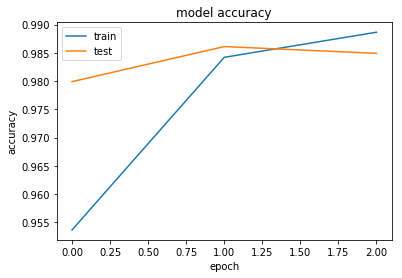

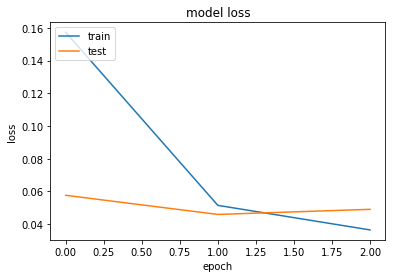

In [39]:
# summarize history for accuracy
plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()